## **CLUSTERIZANDO REVIEWS NO TRIP ADVISOR REFERENTE À VIAGENS PARA LOCAIS TURÍSTICOS DA ÁSIA ORIENTAL**

Reviews de viagens para a Ásia Oriental, divididos em 10 categorias atreladas à tipos de locais (restaurantes, galerias de artes, resorts, etc). A base possui, ao todo, 980 reviews.

**OBS**: A nota fornecida por cada usuário varia entre 0 e 4.

**Obejtivo**: Identificar grupos com características semelhantes com relação aos reviews fornecidos no Tripadivsor, objetivando possíveis melhorias nos pacotes oferecidos aos clientes.

## **Instalando e carregando os pacotes**

In [ ]:
pacotes <- c("tidyverse","cluster","dplyr","dendextend","factoextra","fpc","gridExtra",
             "readxl")

if(sum(as.numeric(!pacotes %in% installed.packages())) != 0){
  instalador <- pacotes[!pacotes %in% installed.packages()]
  for(i in 1:length(instalador)) {
    install.packages(instalador, dependencies = T)
    break()}
  sapply(pacotes, require, character = T) 
} else {
  sapply(pacotes, require, character = T) 
}

# **Carregando dados**

*   Leitura dos dados;
*   tratamento inicial;
*   Acessando dados do Dataset;
*   Padronização dos dados




In [ ]:
# Carregando os dados
tripadvisor_review <- read.table("/content/Projetos/Trip_Advisor/tripadvisor_review.csv", sep=",", dec=".", header = T)

# Acessando os primeiros itens do dataset
head(tripadvisor_review)

# Movendo a coluna ID do usuário (dado categórico) 
rownames(tripadvisor_review) <- tripadvisor_review[,1]
tripadvisor_review <- tripadvisor_review[,-1]
tripadvisor_review

#Renomeando as colunas
tripadvisor_review <- rename(tripadvisor_review, "art galleries" = "Category.1", "dance clubs" = "Category.2", "juice bars" = "Category.3", "restaurants" = "Category.4", "museums" = "Category.5", "resorts" = "Category.6", "parks/picnic spots" = "Category.7", "beaches" = "Category.8", "theaters" = "Category.9", "religious institutions" = "Category.10")
tripadvisor_review

# Padronizar dados
tripadvisor_review.padronizado <- scale(tripadvisor_review)
tripadvisor_review.padronizado

### **Rodando de 5 a 8 centros para visualizar qual a melhor divisão a ser feita**

In [ ]:
# rodando de 5 a 8 centros e identificar qual a melhor divisão
tripadvisor.k5 <- kmeans(tripadvisor_review.padronizado, centers = 5)
tripadvisor.k6 <- kmeans(tripadvisor_review.padronizado, centers = 6)
tripadvisor.k7 <- kmeans(tripadvisor_review.padronizado, centers = 7)
tripadvisor.k8 <- kmeans(tripadvisor_review.padronizado, centers = 8)

#Criando graficos
Graf1 <- fviz_cluster(tripadvisor.k5, geom = "point", data = tripadvisor_review.padronizado) + ggtitle("k = 5")
Graf2 <- fviz_cluster(tripadvisor.k6, geom = "point",  data = tripadvisor_review.padronizado) + ggtitle("k = 6")
Graf3 <- fviz_cluster(tripadvisor.k7, geom = "point",  data = tripadvisor_review.padronizado) + ggtitle("k = 7")
Graf4 <- fviz_cluster(tripadvisor.k8, geom = "point",  data = tripadvisor_review.padronizado) + ggtitle("k = 8")

# Agrupar os graficos em uma matriz
grid.arrange(Graf1, Graf2, Graf3, Graf4, nrow = 2)

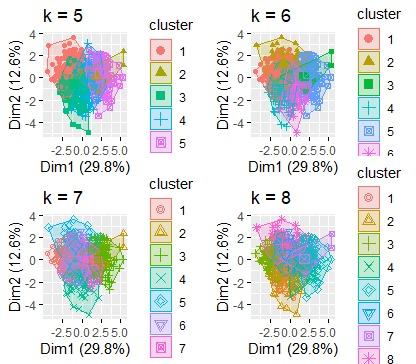

## **Verificando através do método ELBOW**

In [ ]:
fviz_nbclust(tripadvisor_review.padronizado, FUN = hcut, method = "wss")

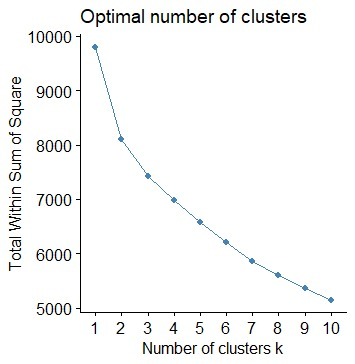

Analisando a variabilidade, optei por utilizar 8 grupos

## **Agrupando dados na base principal**

In [ ]:
# n° de grupos selecionados - 8 grupos
tripadvisor_review2 <- read.table("/content/Projetos/Trip_Advisor/tripadvisor_review.csv", sep=",", dec=".", header = T)
tripadvisorcluster <- data.frame(tripadvisor.k8$cluster)

# Agrupando cluster a base principal
tripadvisor_agrupado <- cbind(tripadvisor_review,tripadvisorcluster)
tripadvisor_agrupado

## **Analisando clusters criados**

In [ ]:
tripadvisor_agrupado %>% group_by("Grupos" = tripadvisor.k8.cluster) %>% summarise("Quantidade"=n() ,across(everything(), list(mean)))

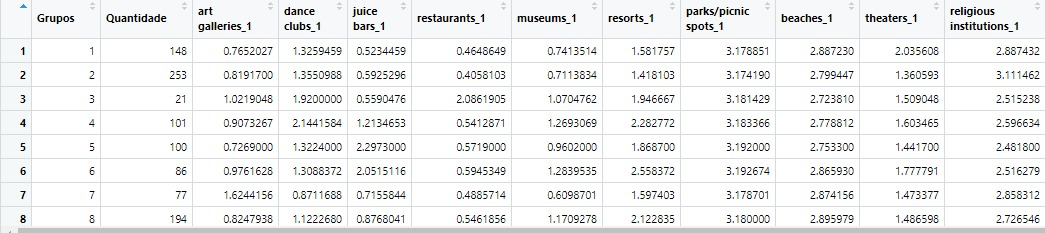



**OBSERVAÇÃO**: Há dois clusters que merecem ser estudados com maiores detalhes:

Grupo 3: esse grupo tem a menor quantidade de reviews, mas possui uma das piores notas na categoria: "Juice bars";

Grupo 2: Esse grupo possui a maior quantidade de reviews, representando uma das piores performances nas categorias "Juice bars" e "Restaurants";

